# ImageDataGeneratorを用いたデータ拡張
https://keras.io/preprocessing/image/

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

Using TensorFlow backend.


## numpy形式の画像を拡張する場合

In [2]:
def onehot_to_str(label):
    """
    ワンホットベクトル形式のラベルをカタカナ文字に変換する
    """
    dic_katakana = {"a":0,"i":1,"u":2,"e":3,"o":4,"ka":5,"ki":6,"ku":7,"ke":8,"ko":9,"sa":10,"si":11,"su":12,"se":13,"so":14}
    label_int = np.argmax(label)
    for key, value in dic_katakana.items():
        if value==label_int:
            return key

def show_image(img): 
    pil_img = Image.fromarray(img)
    #plt.imshow(img)
    plt.imshow(pil_img)
    plt.gray()
    plt.show()
    return


# 画像読み込み
data = np.load("../1_data/train_data.npy")  # パスは適宜変更すること
label = np.load("../1_data/train_label.npy")  # パスは適宜変更すること

print("data.shape", data.shape)
print(label.shape)

#for i in range(1):
#    label_= label[i]
#    img = data[i]
#    print("label=%s"%label_)
#    img = img.reshape(28,28)
#    img = np.uint8(img*255)
#    show_image(img)

# 軸をN,H,W,Cに入れ替え
data = data.transpose(0,2,3,1)
print("data.shape", data.shape)

num = 3000

for i in range(5):
    print(i)

    for j in range(num):
        
        # ImageDataGeneratorのオブジェクト生成
        datagen = ImageDataGenerator(
            rescale=1./255,
            #target_size=(28, 28),
            #rescale=1,
            rotation_range=10,
            width_shift_range=0.05,
            height_shift_range=0.05,
            shear_range=10.0,
            zoom_range=[1.0,1.2],
            fill_mode='constant', 
            cval=255.0, #ココの値で色を変える
            horizontal_flip=False)
    
        
        # j番目の画像を取り出し
        data_ = data[j:j+1,:,:,:]
        label_ = label[j]
        label_ = onehot_to_str(label_)
    
    
        # 生成
        g = datagen.flow(data_, batch_size=1, save_to_dir='../1_data/imagedatagenerator/%s/'%label_,
                         save_format='png', save_prefix='out_%s_from_npy_'%label_)
        
        np_img = g.next()
        # 軸をN,W,C,Hに入れ替え
        np_img = np_img.transpose(0,3,1,2)
        #np_img = np_img
        
        #np_label = label[j]
        
        #↓チェック
        np_img = np_img.reshape(28,28)
        np_img = np.uint8(np_img*255)
        np_img = np_img.reshape(1,1,28,28)
        #print("np_img")
        #show_image(np_img)
        #↑チェック
        
        
        # numpy形式に変換
        pixel = 28
        num_image = 1 # 画像枚数
        channel = 1 # グレースケール
        data_npimg = np.empty((num_image, channel, pixel, pixel)) # 配列初期化
        
        
        
        img_tmp = np_img
        img_tmp = np.array(img_tmp).astype(np.float32)
        #data_tmp[0, 0, :] = img_tmp
        
        
        img_tmp = img_tmp.reshape(28,28)
        img_tmp = np.uint8(img_tmp*255)
        #print("before")
        #show_image(img_tmp)
        img_tmp = img_tmp.reshape(1,1,28,28)
        
        img_tmp = img_tmp.reshape(28,28)
        img_tmp = np.uint8(img_tmp*255)
        #print("before")
        #show_image(img_tmp)
        img_tmp = img_tmp.reshape(1,1,28,28)
    
        
        #print(j)
        if(i == 0 and j == 0):
            #np_imgset = np_img
            np_imgset = np.array(img_tmp).astype(np.float32)
            np_labelset = label[j:j+1,:]
        else:
            np_imgset = np.concatenate([np_imgset, img_tmp])
            np_labelset = np.concatenate([np_labelset, label[j:j+1,:]])

    
        tmp = np_imgset[j,:,:,:].reshape(28,28)
        tmp = np.array(tmp).astype(np.float32)
        tmp = np.uint8(tmp*255)
        #print("after")
        #show_image(tmp)
    
    #p_labelset = label
    
    
print(np_imgset.shape)
print(np_labelset.shape)
np.save('../1_data/imagedatagenerator/train_data_expansion', np_imgset)
np.save('../1_data/imagedatagenerator/train_label_expansion', np_labelset)
    



data.shape (3000, 1, 28, 28)
(3000, 15)
data.shape (3000, 28, 28, 1)
0
1
2
3
4
(15000, 1, 28, 28)
(15000, 15)


(3000, 1, 28, 28)
(3000, 15)
(15000, 1, 28, 28)
(15000, 15)
label=[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


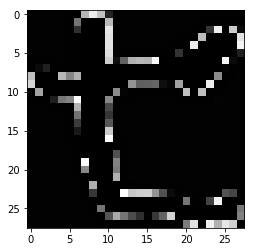

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


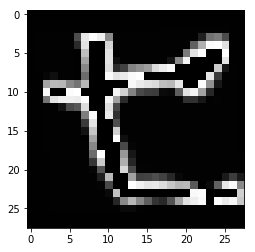

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


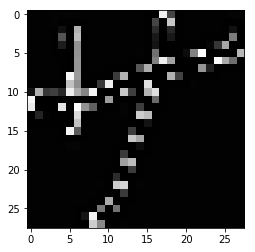

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


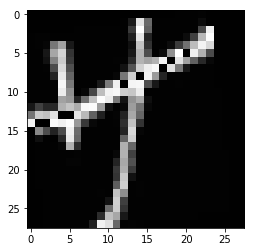

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


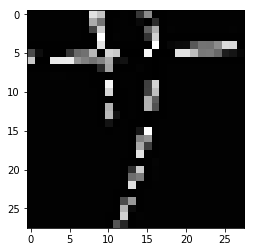

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


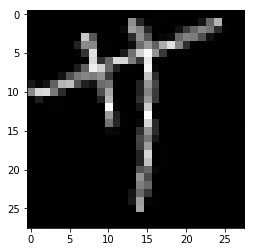

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


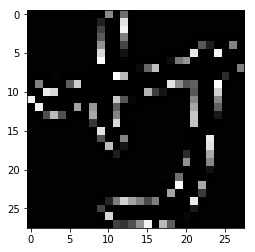

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


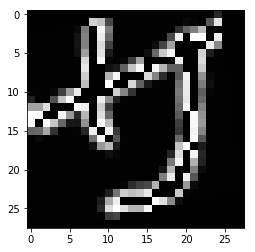

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


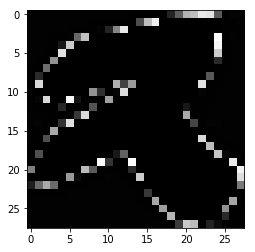

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


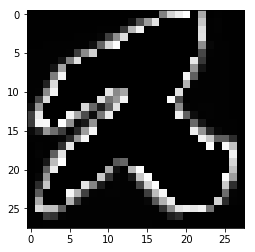

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


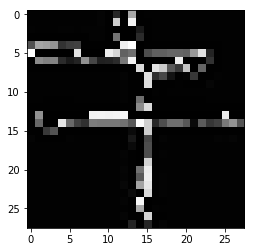

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


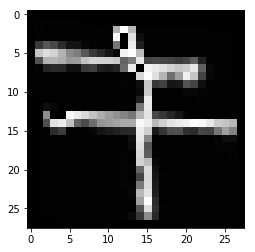

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


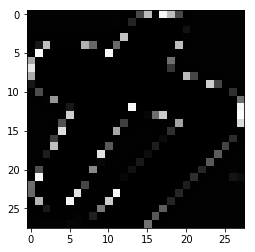

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


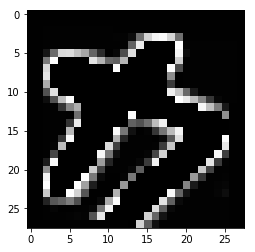

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


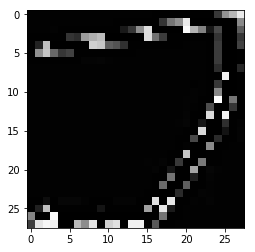

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


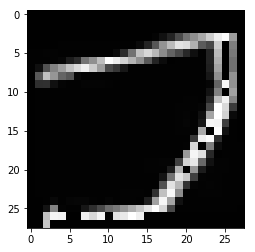

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


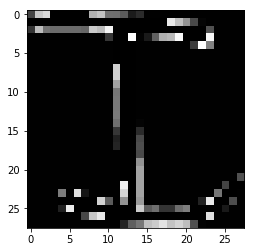

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


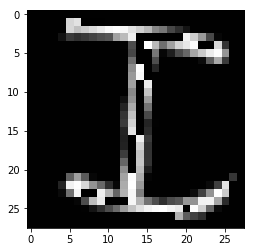

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


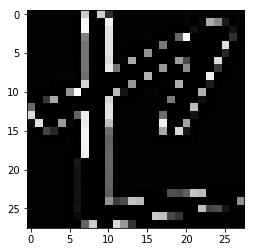

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


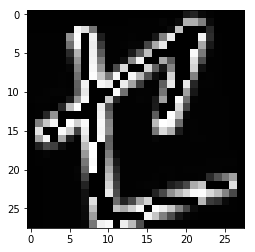

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


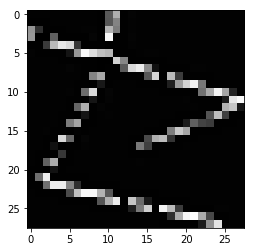

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


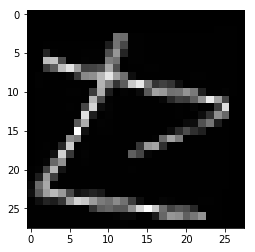

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


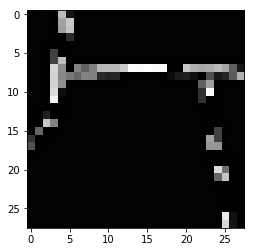

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


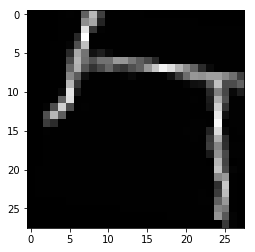

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


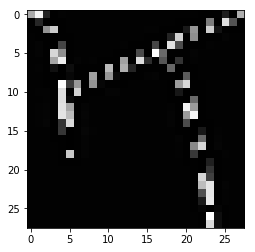

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


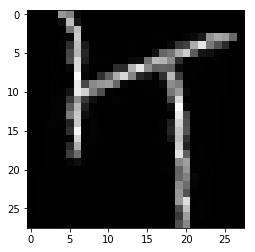

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


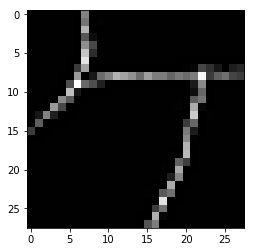

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


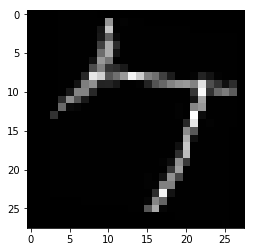

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


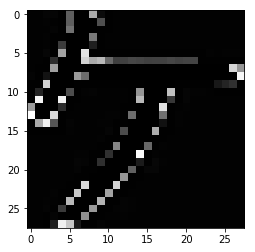

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


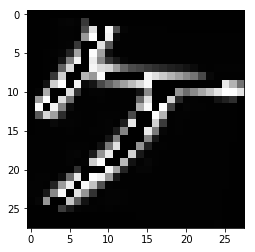

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


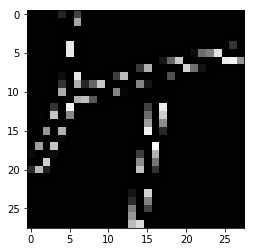

label=[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


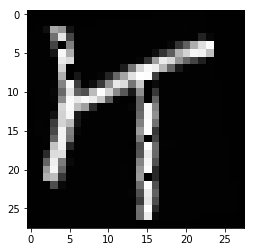

label=[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


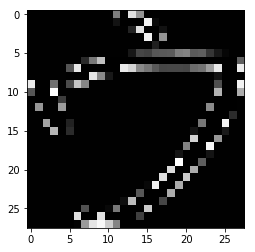

label=[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


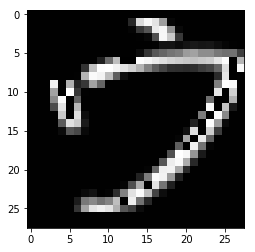

label=[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


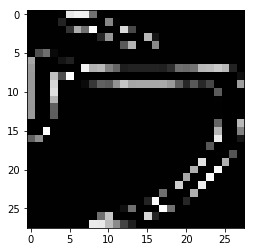

label=[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


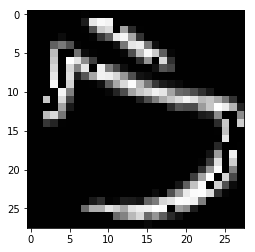

label=[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


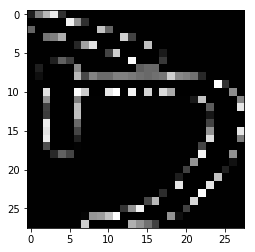

label=[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


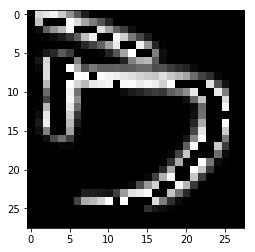

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


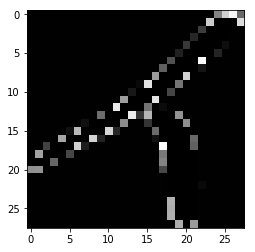

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


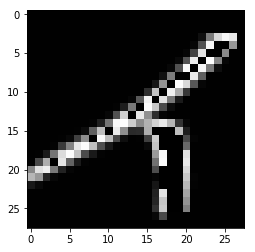

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


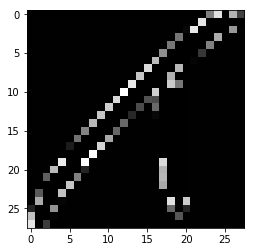

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


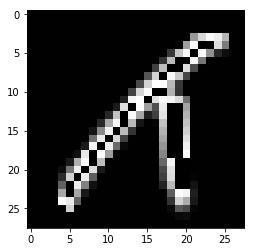

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


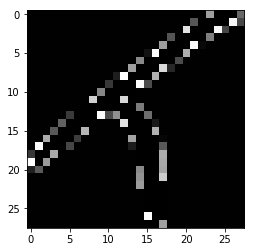

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


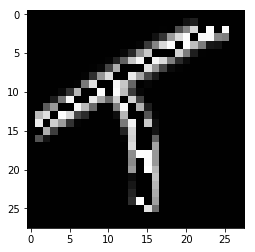

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


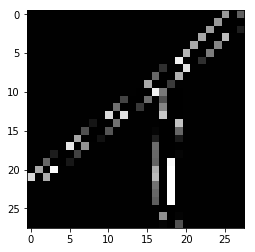

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


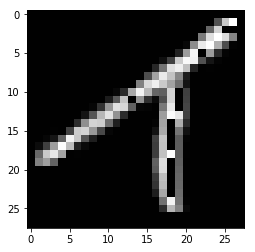

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


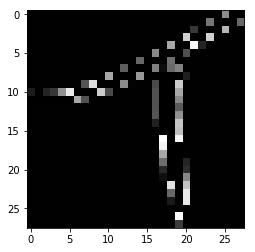

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


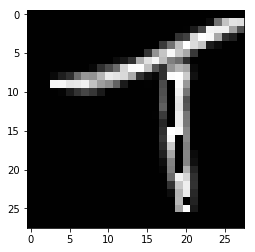

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


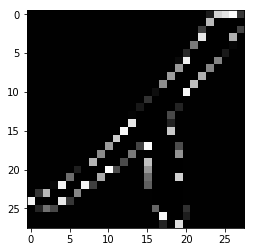

label=[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


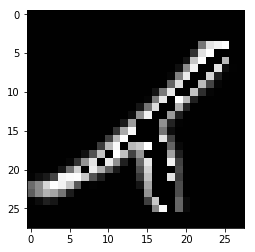

label=[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


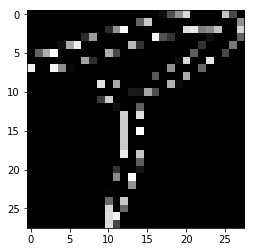

label=[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


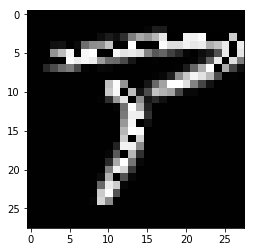

label=[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


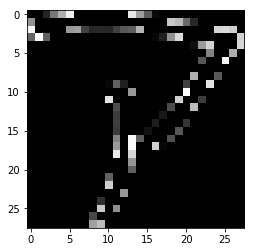

label=[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


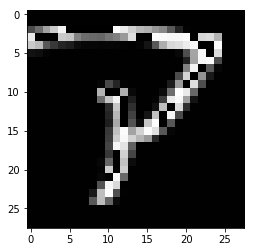

label=[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


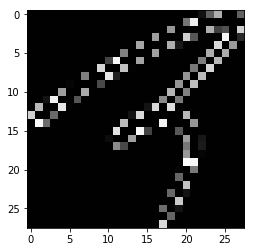

label=[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


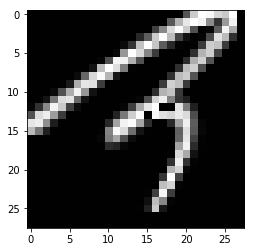

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


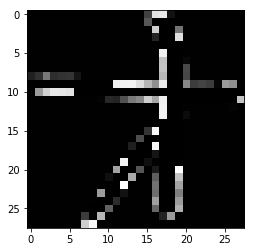

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


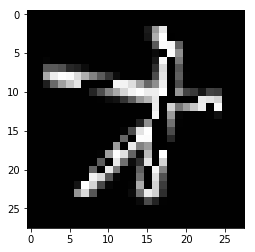

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


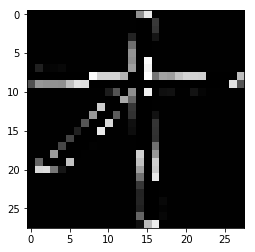

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


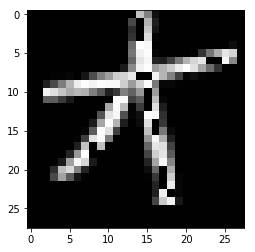

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


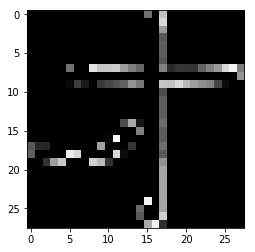

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


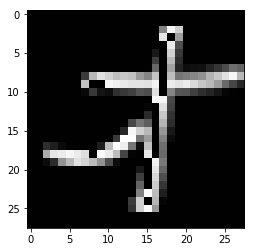

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


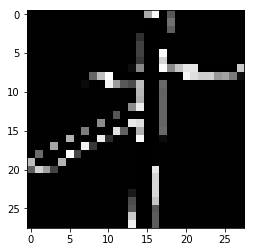

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


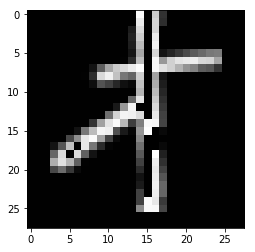

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


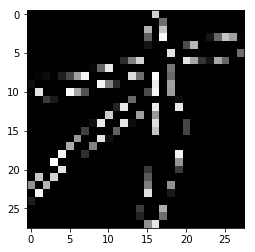

label=[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


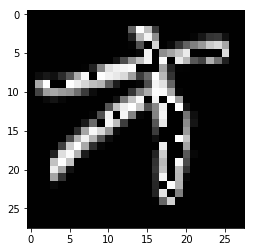

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


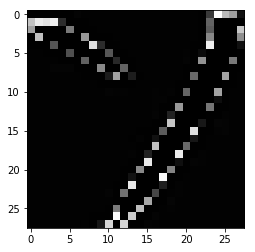

label=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


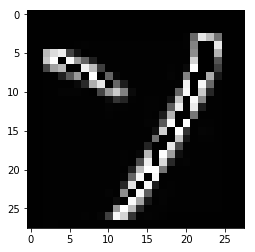

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


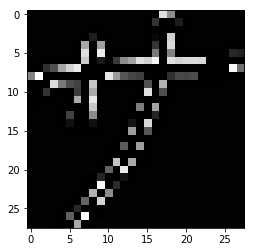

label=[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


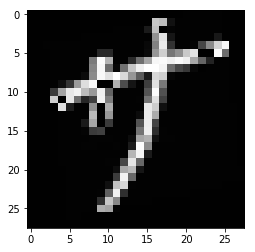

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


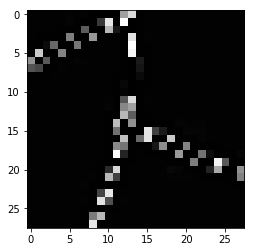

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


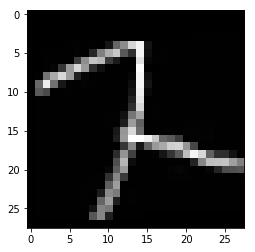

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


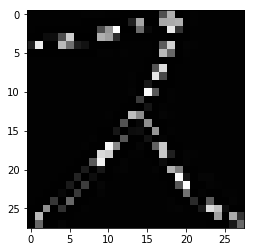

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


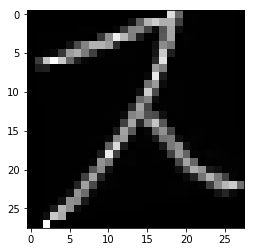

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


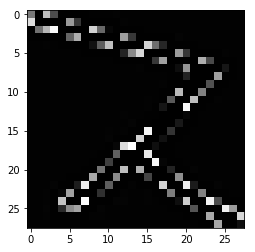

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


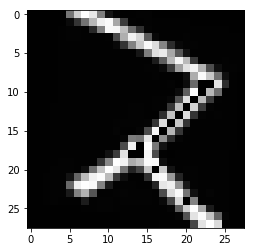

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


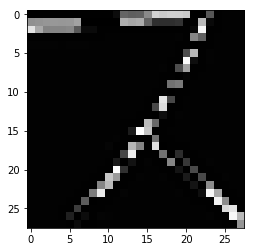

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


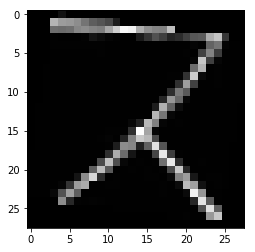

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


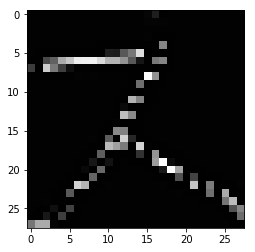

label=[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


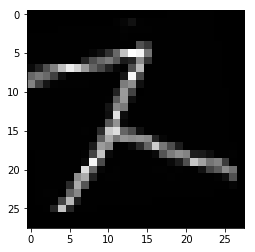

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


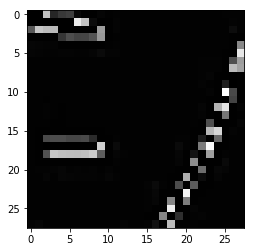

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


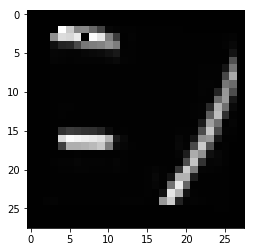

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


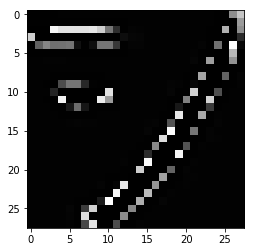

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


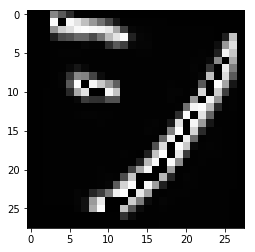

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


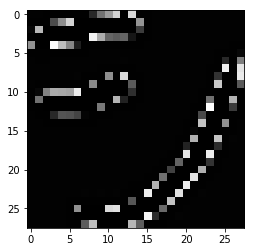

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


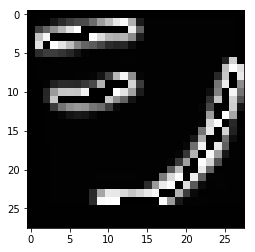

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


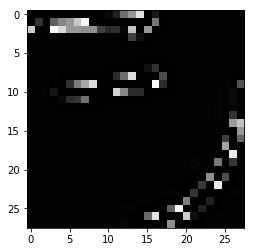

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


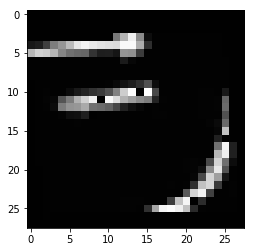

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


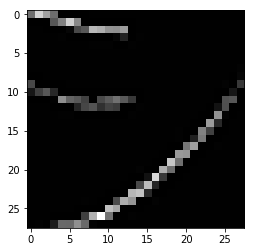

label=[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


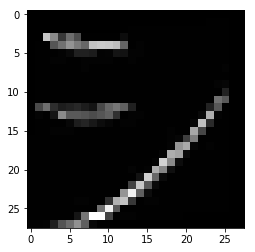

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


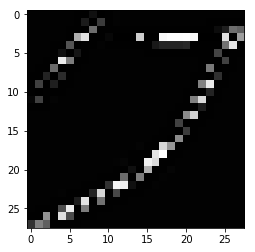

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


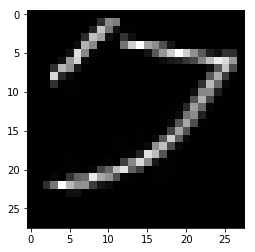

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


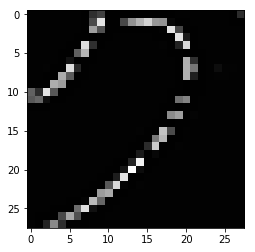

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


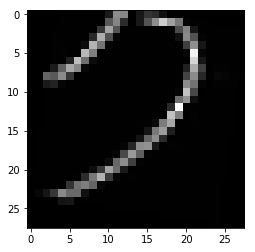

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


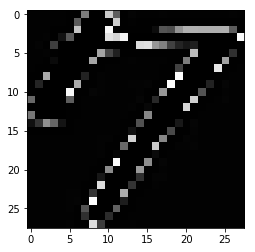

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


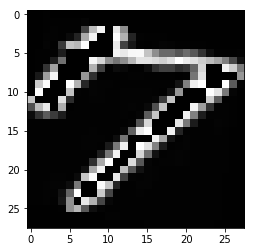

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


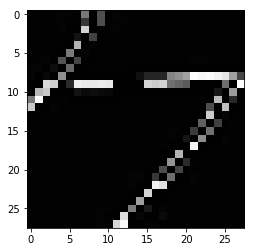

label=[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


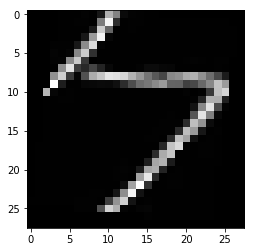

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


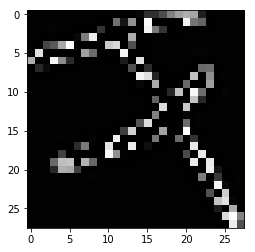

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


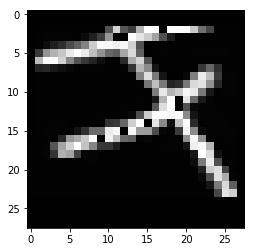

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


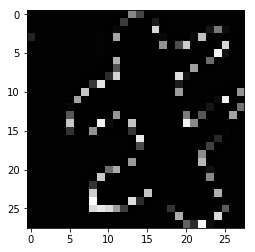

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


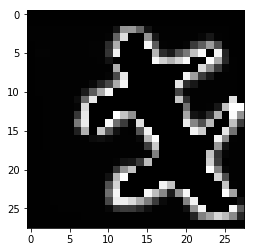

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


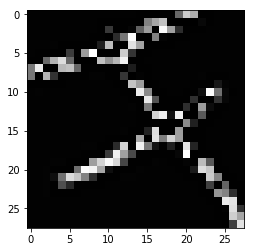

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


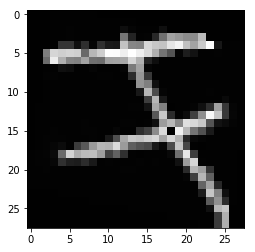

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


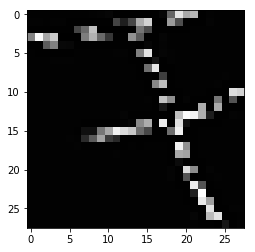

label=[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


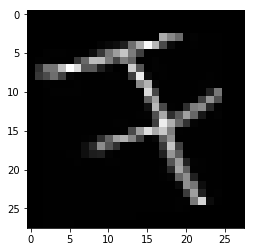

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


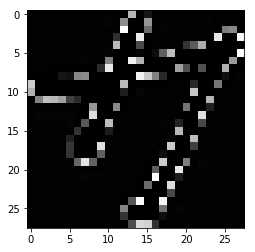

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


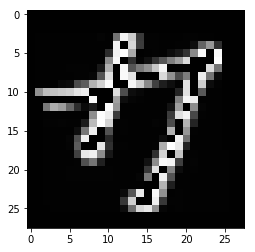

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


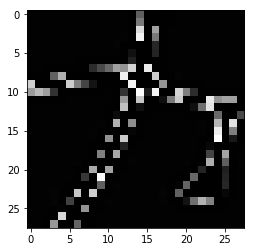

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


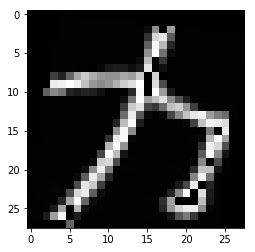

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


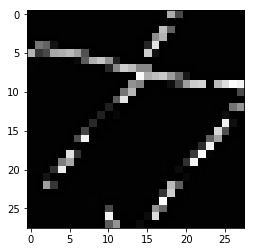

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


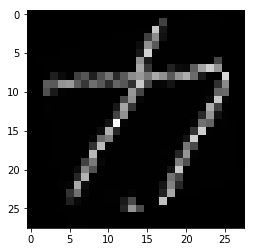

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


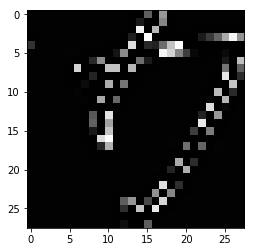

label=[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


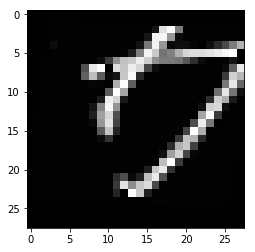

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


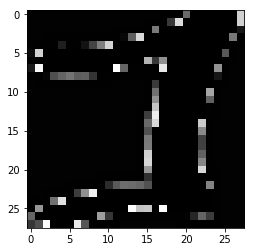

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


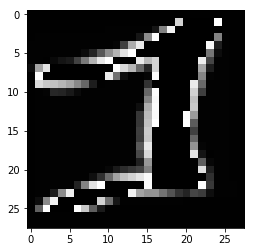

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


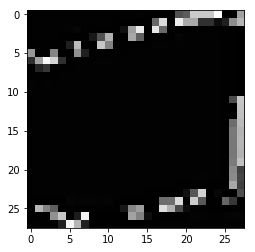

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


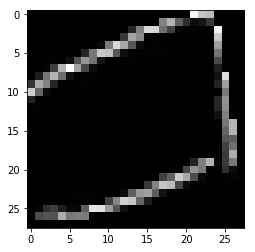

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


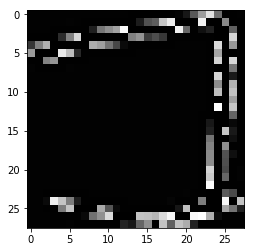

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


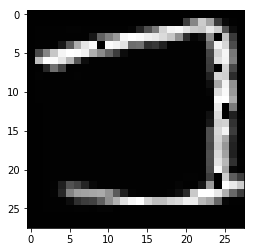

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


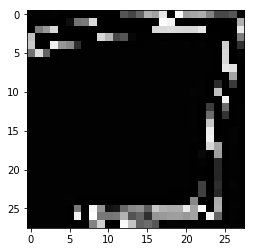

label=[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


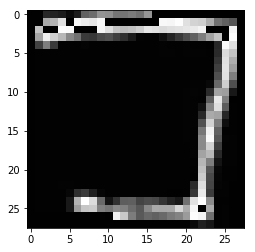

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


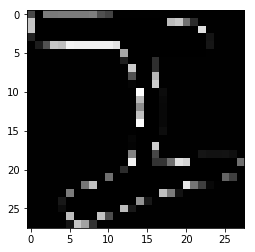

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


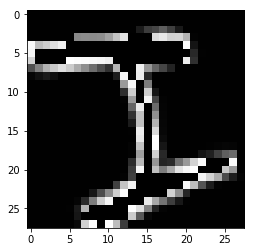

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


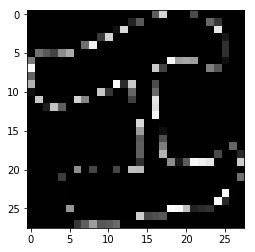

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


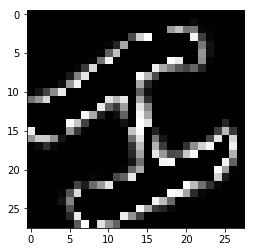

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


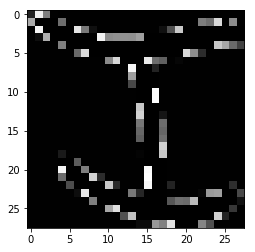

label=[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


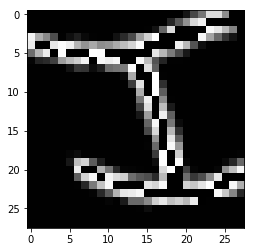

In [3]:
data_org = np.load("../1_data/train_data.npy")  # パスは適宜変更すること
label_org = np.load("../1_data/train_label.npy")  # パスは適宜変更すること
print(data_org.shape)
print(label_org.shape)


train_data = np.load("../1_data/imagedatagenerator/train_data_expansion.npy")
train_label = np.load("../1_data/imagedatagenerator/train_label_expansion.npy")
print(train_data.shape)
print(train_label.shape)

for i in range(num):
    
    if(0.98<np.random.rand()):        
        label_= label_org[i]
        img = data_org[i]
        print("label=%s"%label_)
        img = img.reshape(28,28)
        img = np.uint8(img*255)
        show_image(img)

        label = train_label[i]
        img = train_data[i]
        print("label=%s"%label)
        img = img.reshape(28,28)
        img = np.uint8(img*255)
        show_image(img)
        
#        label = train_label[3000+i]
#        img = train_data[3000+i]
#        print("label=%s"%label)
#        img = img.reshape(28,28)
#        img = np.uint8(img*255)
#        show_image(img)

## pngの画像を拡張する場合

In [4]:
# 元画像
fname = "../1_data/imagedatagenerator/a_201.png"
pixel = 28

# numpy形式に変換
num_image = 1 # 画像枚数
channel = 1 # グレースケール
data = np.empty((num_image, channel, pixel, pixel)) # 配列初期化

# 画像読み込み
img_ = Image.open(fname)
img_ = np.array(img_).astype(np.float32)
data[0, 0, :] = img_

# 軸をN,H,W,Cに入れ替え
data = data.transpose(0,2,3,1)

# ImageDataGeneratorのオブジェクト生成
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 生成後枚数
num_image = 3

# 生成
g = datagen.flow(data, batch_size=1, save_to_dir="../1_data/imagedatagenerator/", save_format='png', save_prefix='out_a_from_png_')
for i in range(num_image):
        batches = g.next()
        print(batches.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../1_data/imagedatagenerator/a_201.png'